# Probability Distributions

During the course, we will be dealing with a lot of probability distributions. So it is a good idea to get familiar with these distributions. We will mainly be dealing with two probability distributions : Bernoulli Distribution (for discrete variables), and Normal Distribution (for continuous variables).
## Bernoulli Distribution
Consider a binary random variable $X$ i.e. it can have two possible outcomes. Let the two outcomes be 0 and 1. An example of such random variable is the outcome of a coin toss. The distrbution is parameterized by a single parameter $\phi$,  whose value can be between 0 and 1 (inclusive). Intuitively, $\phi$ tells the probability of $X=1$
$$P(X=1)=\phi$$
and so
$$P(X=0)=1-\phi$$
<hr>
Here are some questions for you to understand this distribution in more detail :

Q.1. Find the expected value of $X$ in terms of $\phi$.

Q.2. Find the variance of $X$ in terms of $\phi$.

Q.3. Now suppose we want to sample a point from a Bernoulli distribution with a given $\phi$. Then we can do that using numpy's binomial function. The code below shows how to sample a point for $\phi=0.4$. Run this code for $\phi=0.7$

In [ ]:
import numpy as np
phi = 0.4
x = np.random.binomial(n=1, p=phi)
print(x)

Q.4. In above question, we sampled a single point, but that would be either 0 or 1, and that would not give us a chance to verify whether this point is indeed sampled with the given $\phi$. For that, we need to sample many points, and then we would be able to verify. So now in the following code, we sample 100 points with $\phi=0.4$, and compute their average. You should run this code for $\phi=0.7$, and compute the average of the sampled points. Is the average close to 0.7 ? What happens when you increase the number of samples ?

In [ ]:
import numpy as np
phi = 0.4
num_samples = 100
x = np.random.binomial(n=1, p=phi, size=(num_samples,1))
avgx = np.mean(x)
print(avgx)

Q.5. In the above code, we see that every run gives different answer i.e. sample mean is different for every run. As we increase the number of samples, sample means are different but are closer to each other. We want to find distribution of these sample means. So now, we perform the above task 1000 times, and plot the sample mean in each case. To plot those, we will use a histogram.

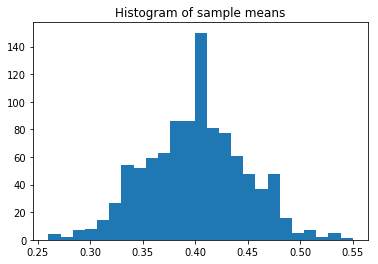

In [2]:
import numpy as np
import matplotlib.pyplot as plt
phi = 0.4
num_samples = 100
num_iter = 1000
sample_means = []
for i in range(num_iter):
    x = np.random.binomial(n=1, p=phi, size=(num_samples,1))
    avgx = np.mean(x)
    sample_means.append(avgx)
plt.hist(sample_means, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of sample means")
plt.show()

As we see in the above output, the distribution resembles normal distribution with mean = 0.4. This phenomeanon is called the __[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)__. Now run above code for $\phi=0.7$. What happens when you increase the number of samples and number of iterations?

## Normal Distribution
This distribution is defined over a continuous real-valued random variable $X$, which can take any value between $-\infty$ to $\infty$. It is a bell shaped curve, and occurs in many real-life scenarios like heights of students in a class, or temparature in a day etc. Its probability density function (pdf) is given as : 
$$P(X=x)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{\sigma^2}\right)$$
Here $\mu$ and $\sigma$ are the mean and standard deviation of the distribution respectively. Intuitively, $\mu$ decides the position of the peak of distribution, and $\sigma$ decides the spread of the distribution.
<hr>
Here are some of the questions for you to understand this distribution in more detail :

Q.1. First let us visualize the distribution with a given mean and standard deviation. Let $\mu=0$, and $\sigma=1$. A normal distribution with these parameter values is also called standard normal distribution. In the code below, we will calculate pdf for different values of $X$ and plot them. For calculating the pdf, we can directly use __[scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)__ object.

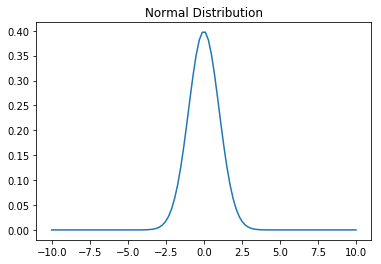

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Create 100 different values of x, ranging from -10 to 10
x = np.linspace(-10,10,100)
mu = 0
sigma = 1

# Calculate pdf for all values of x
y = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x,y)
plt.title("Normal Distribution")
plt.show()

In the above code, $\mu=0$ and $\sigma=1$. Modify the above code for $\sigma=2$. What do you observe ? What happens when you keep increasing the value of $\sigma$ ?

Q.2. In the above description of normal distribution, we talked about only one-dimensional points. Let us see what happens when $X$ is a multi-dimensional random variable. Suppose $X$ is a $k$ dimensional random variable. Then pdf of this multivariate normal distribution is given as : 
$$P(X=x)=\frac{1}{(2\pi)^{k/2}|\Sigma|^{1/2}}\exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$
Here $\mu$ is a $k$ dimensional mean vector, and $\Sigma$ is a $k*k$ symmetric covariance matrix. Let us visualize Normal distribution when we have 2-D points i.e. $k=2$. First we create 2D points in the code below.

In [1]:
import numpy as np
# First create range of points in both axes. Here we are taking 60 points from -3 to 3 in each axis i.e. there will be 
# total 3600 points
x = np.linspace(-3,3,60)
y = np.linspace(-3,3,60)
# Now we get those 3600 points using meshgrid. Meshgrid creates two matrices X and Y of size 60*60 each, and 
# X[i][j],Y[i][j] would be a single point
X,Y = np.meshgrid(x,y)
# finally we want those 3600 points in 1 vector i.e. we need a 3600*2 vector, whose each entry is a point
points = np.array([X.flatten(),Y.flatten()]).T

Now we have 3600 2D points, we need to calculate pdf at each point. For this example, we let mean to be [0,0], and 
covariance to be identity matrix.

In [2]:
from scipy.stats import multivariate_normal as mvn
mu=np.zeros(2)
sigma = [[1,0],[0,1]]
rv = mvn(mean=mu,cov=sigma)
z = rv.pdf(points).reshape(60,60)

Now we have pdf at each point stored in variable z, we can plot the normal distribution in 3D space.

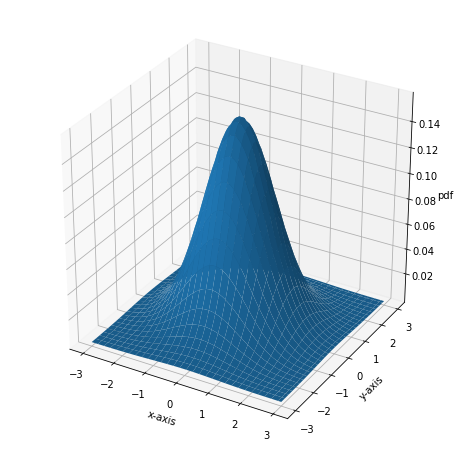

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Create a figure object
fig = plt.figure()
fig.set_size_inches(8,8)
# Create a 3D axes object from figure object
ax = fig.gca(projection='3d')

ax.plot_surface(X,Y,z)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('pdf')
plt.show()

We can also plot the contours of the distribution. The contours are the set of points at which pdf for all points is same.

In [ ]:
import matplotlib.pyplot as plt
# Again create a figure object
fig = plt.figure()
fig.set_size_inches(5,5)
# Create an axes object from figure object (this time its not 3D)
ax = fig.gca()

ax.contour(X,Y,z)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
plt.show()

As we can see here, contours are circles for the identity covariance matrix. If we increase the variance at x-axis, then these circles will become ellipses flattened along x-axis.

In [ ]:
sigma = [[3,0],[0,1]]
rv = mvn(mean=mu,cov=sigma)
z = rv.pdf(points).reshape(60,60)

fig = plt.figure()
fig.set_size_inches(5,5)
ax = fig.gca()
ax.contour(X,Y,z)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
plt.show()

Now you can play with the covariance matrix and see the contours.

Q.2 (a) Set $\Sigma=I$, then $\Sigma=2I$, and then $\Sigma=3I$, where $I$ is the identity matrix. What do you observe?

Q.2 (b) Set $\Sigma=[[3,2],[2,1]]$. What do you observe ?